<a href="https://colab.research.google.com/github/gabrielalastra/machine_learning/blob/main/HeartDisease_DecsionTree_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<body>
<div align='center'>
<h1>Decision Tree and Random Forests</h1>
<h4>using the dataset on Heart Disease in Cleveland, donated to UCI Repository.</h4></div>
<p> The column 'target' means N for no presence and Y fore presence in levels 1,2,3,4.
<p>The information on the 14 attribute:
<li>age--in years
<li>sex--(1 = male; 0 = female)
<li>cp--chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal, pain 4: asymptomatic)
<li>trestbps -- resting blood pressure
<li>chol--serum cholesterol in mg/dl
<li>fbs--fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
<li>restecg--resting ecg (electrocardiographic) results
<li>thalach--maximum heart rate achieved
<li>exang--exercise induced angina (1 = yes; 0 = no)
<li>oldpeak--ST depression induced by exercise relative to rest
<li>slope--the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)
<li>ca-- number of major vessels (0-3) colored by flourosopy
<li>thal-- 3 = normal; 6 = fixed defect; 7 = reversable defect
<li>the predicted attribute (0, 1, 2, 3 4) -- In the processed dataset, this one is added as a new column 'target' with 'N' for 0 and 'Y' for 1,2,3 & 4.
</body>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Machine_Learning_Material/S_13_Trees/HD_Cleveland_Data_Clean.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,N
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Y
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,Y
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,N
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,N


In [5]:
print('Null', df.isnull().value_counts())
print('\nNaN', df.isna().value_counts())

Null age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slop   ca     thal   target
False  False  False  False     False  False  False    False    False  False    False  False  False  False     297
dtype: int64

NaN age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slop   ca     thal   target
False  False  False  False     False  False  False    False    False  False    False  False  False  False     297
dtype: int64


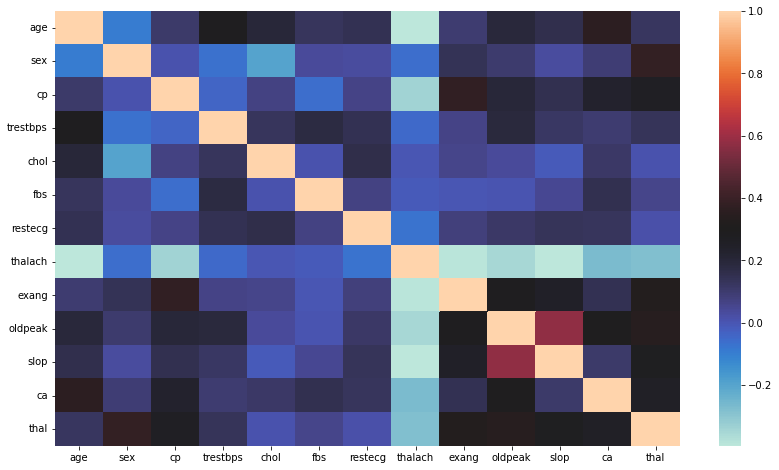

In [6]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), cmap='icefire')

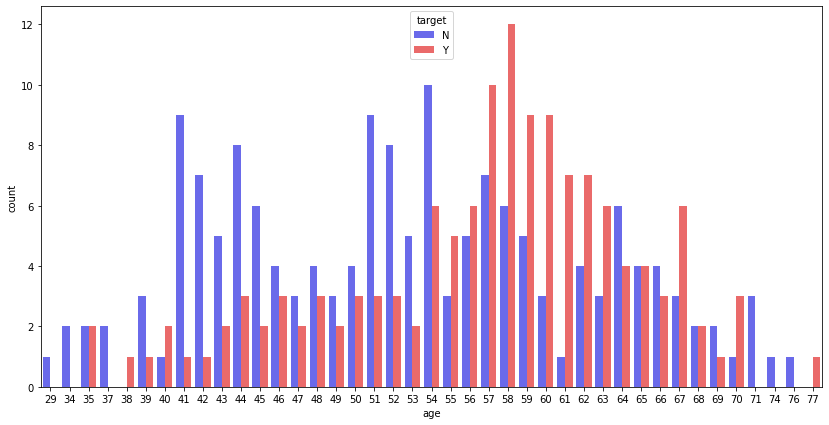

In [7]:
plt.figure(figsize=(14,7))
sns.countplot(data=df, x='age', hue='target', palette='seismic')

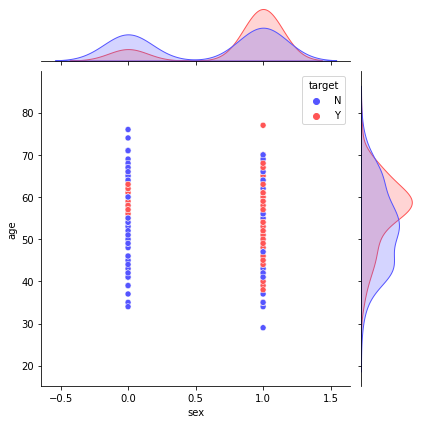

In [8]:
#1=male 0=female
sns.jointplot(data=df, x='sex', y='age',hue='target', palette='seismic')

<body>
Higher frequency in men over 30 years old and womans between 55-65 years old.
</body>

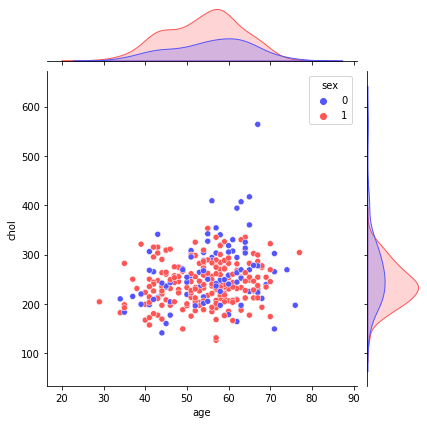

In [9]:
sns.jointplot(data=df, x='age', y='chol',hue='sex',palette='seismic')

<h4>Decision Tree</h4>

In [10]:
X = df.drop('target', axis=1)
y = df['target']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtree = DecisionTreeClassifier()

In [15]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

In [25]:
import pydot

In [22]:
!pip install pydot

In [ ]:
features=df.columns[:-1]
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, 
                feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [29]:
pred = dtree.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score


In [37]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, 
                    vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

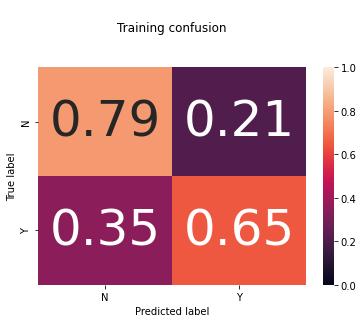

In [42]:
cm = confusion_matrix(y_test, pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dtree.classes_,
                      title='\nTraining confusion\n\n')

In [44]:
for i, column in enumerate(df.drop('target', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dtree.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column],
                       'Feature Importance Score': [dtree.feature_importances_[i]]})
    
    try: #the others values
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except: #the first value
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature age:, 0.156
Importance of feature sex:, 0.000
Importance of feature cp:, 0.127
Importance of feature trestbps:, 0.076
Importance of feature chol:, 0.093
Importance of feature fbs:, 0.010
Importance of feature restecg:, 0.005
Importance of feature thalach:, 0.040
Importance of feature exang:, 0.000
Importance of feature oldpeak:, 0.071
Importance of feature slop:, 0.000
Importance of feature ca:, 0.322
Importance of feature thal:, 0.101


,index,Variable,Feature Importance Score
0,11,ca,0.322404
1,0,age,0.156383
2,2,cp,0.126688
3,12,thal,0.100949
4,4,chol,0.092812
5,3,trestbps,0.075536
6,9,oldpeak,0.070810
7,7,thalach,0.039570
8,5,fbs,0.009522
9,6,restecg,0.005326


In [47]:
#I prefer this visualization 
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(dtree, out_file=None, 
    feature_names=df.drop('target', axis=1).columns,    
    class_names=df['target'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph
graph.render('HeartDisease_decisionTree.svg', format='svg', directory='output').replace('\\', '/')


'output/HeartDisease_decisionTree.svg.svg'

In [49]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           N       0.72      0.79      0.76        53
           Y       0.73      0.65      0.69        46

    accuracy                           0.73        99
   macro avg       0.73      0.72      0.72        99
weighted avg       0.73      0.73      0.73        99



<h4>Let's see how much the model improves with Random Forest</h4>

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rforest = RandomForestClassifier(n_estimators=100)
rforest.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
rf_pred = rforest.predict(X_test)

In [53]:
for i, column in enumerate(df.drop('target', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, rforest.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column],
                       'Feature Importance Score': [rforest.feature_importances_[i]]})
    
    try: #the others values
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except: #the first value
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature age:, 0.102
Importance of feature sex:, 0.033
Importance of feature cp:, 0.121
Importance of feature trestbps:, 0.076
Importance of feature chol:, 0.096
Importance of feature fbs:, 0.011
Importance of feature restecg:, 0.017
Importance of feature thalach:, 0.113
Importance of feature exang:, 0.030
Importance of feature oldpeak:, 0.104
Importance of feature slop:, 0.020
Importance of feature ca:, 0.177
Importance of feature thal:, 0.101


,level_0,index,Variable,Feature Importance Score
0,0,11.0,ca,0.322404
1,24,NaN,ca,0.176517
2,1,0.0,age,0.156383
3,2,2.0,cp,0.126688
4,15,NaN,cp,0.121253
5,20,NaN,thalach,0.113393
6,22,NaN,oldpeak,0.103757
7,13,NaN,age,0.101774
8,25,NaN,thal,0.100957
9,3,12.0,thal,0.100949


In [54]:
print(classification_report(y_test,rf_pred))


              precision    recall  f1-score   support

           N       0.81      0.89      0.85        53
           Y       0.85      0.76      0.80        46

    accuracy                           0.83        99
   macro avg       0.83      0.82      0.83        99
weighted avg       0.83      0.83      0.83        99



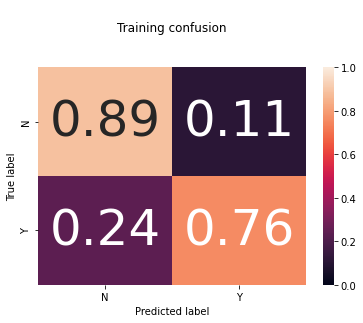

In [55]:
cm = confusion_matrix(y_test, rf_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rforest.classes_,
                      title='\nTraining confusion\n\n')